# Lineare Regression 2D

<p>Nachdem klar ist wie die Lineare Regression im allgemeinen funktioniert, soll das Verfahren auf 2D Daten erweitert werden. Hierf&uuml;r wird ein Foto aus dem Internet geladen und der Gr&uuml;n-Kanal gel&ouml;scht. Mithilfe der Regression und dem Rot/Blau Kanal sollen die verlorenen Daten wieder hergestellt werden.</p>

<p>Dieses Jupyter Notebook steht auch zum <a href="http://home.htw-berlin.de/~hezel/computervision/WS1718/uebung1/LinearRegression_2D_Vorlage.ipynb" target="_blank">download</a> zur Verf&uuml;gung.</p>

<hr />

<h2>Einleitung</h2>


In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from skimage import io
import numpy as np

# enable interactive plots
%matplotlib notebook

In [2]:
def show_image(image):
    plt.close() # close old figures
    fig = plt.figure(figsize = (8,8))    
    ax = fig.add_subplot(1, 1, 1)
    fig.tight_layout()
    ax.imshow(image, interpolation='nearest')

<IPython.core.display.Javascript object>


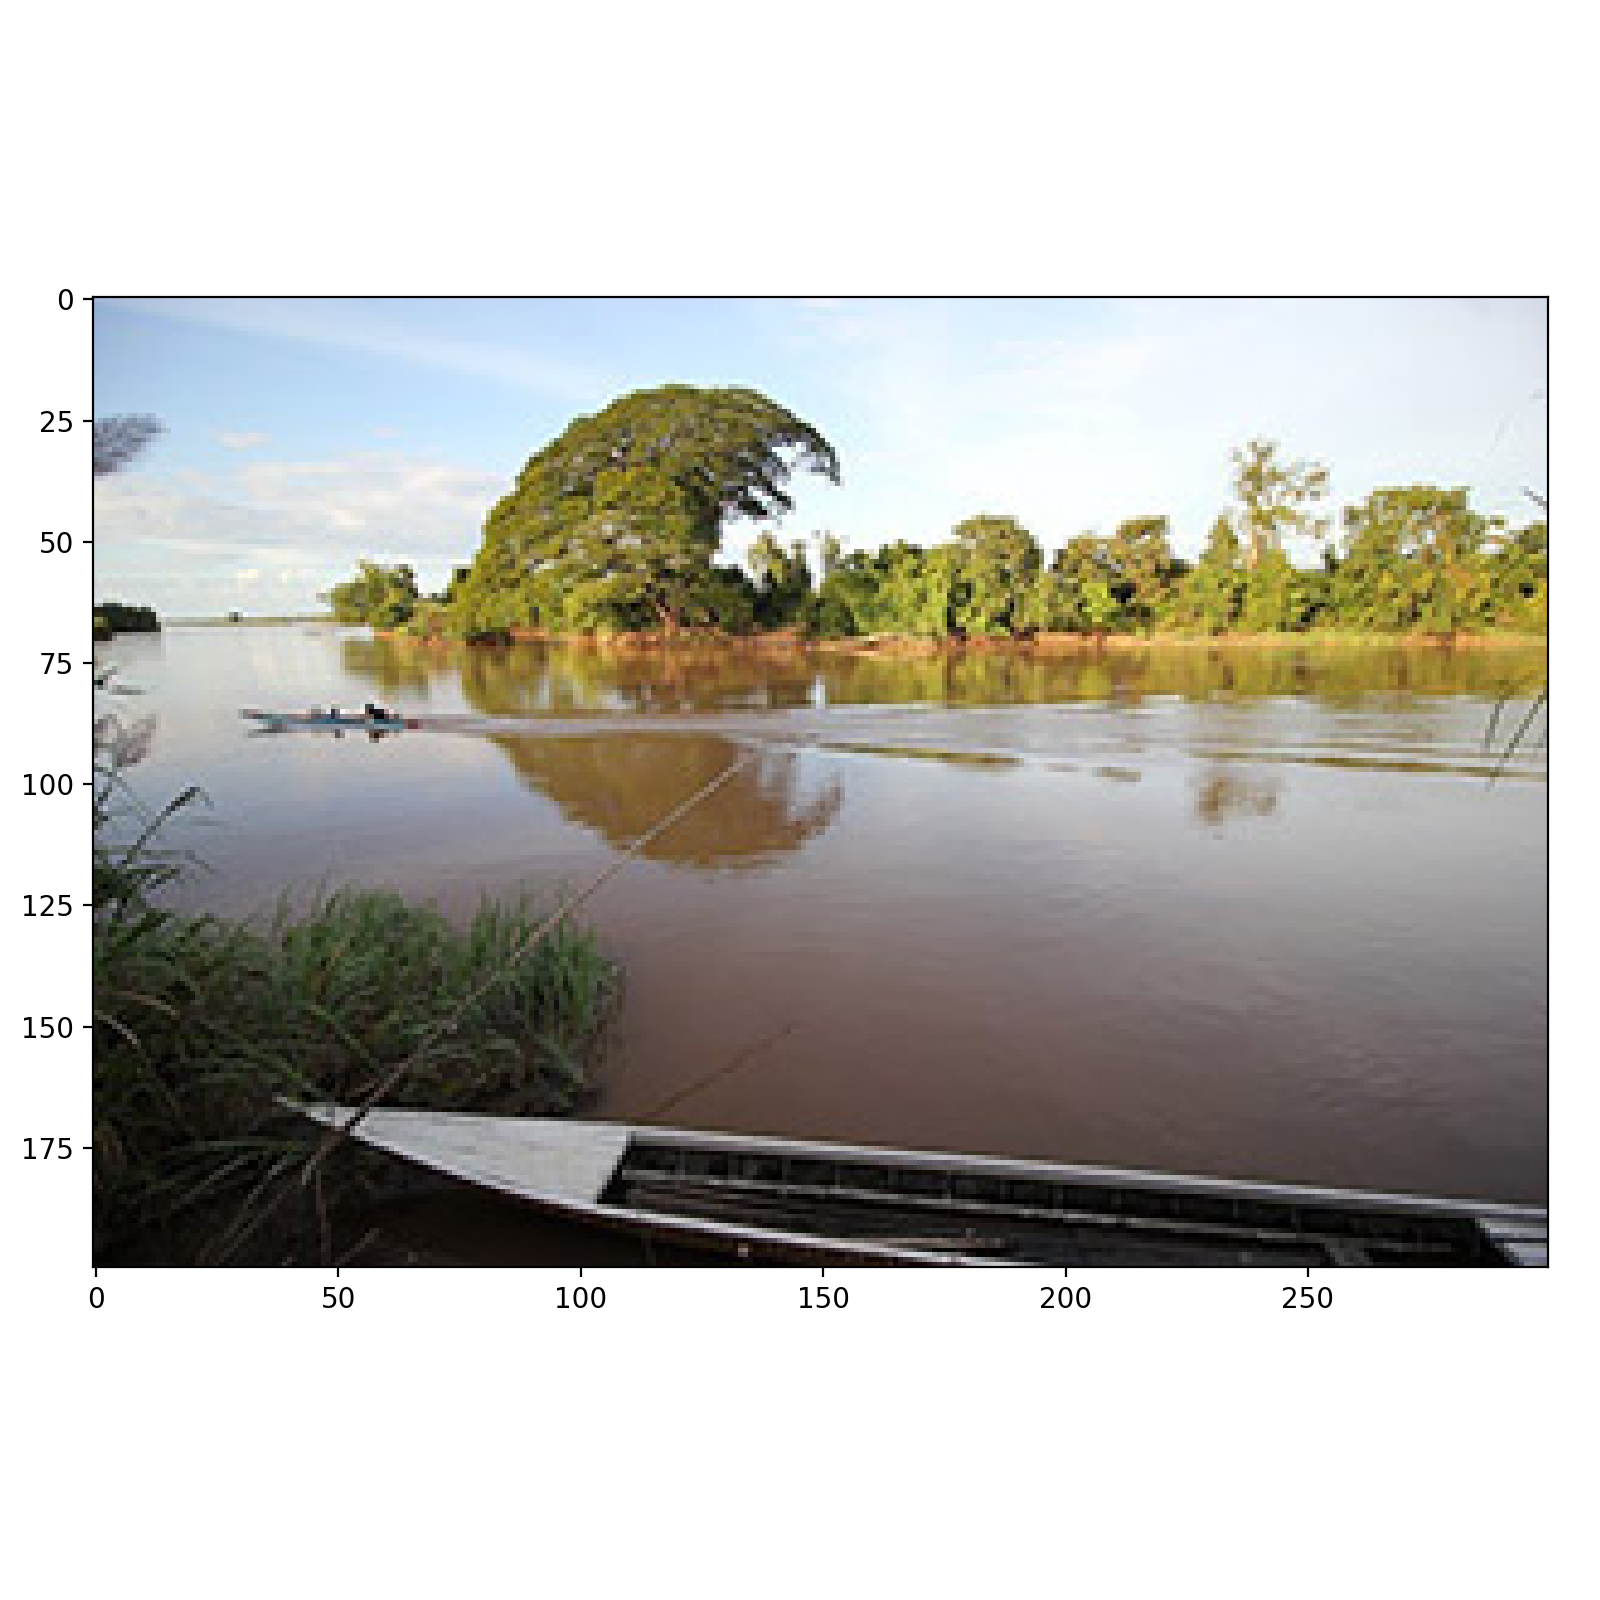

In [9]:
# load and show the trainings image
img = io.imread("http://home.htw-berlin.de/~hezel/computervision/WS1718/uebung1/summer.jpg")
show_image(img)

In [4]:
# TODO print the shape of the image data (rows, columns)
rows = img.shape[0]
cols = img.shape[1]
print(img.shape)

(200, 300, 3)


In [10]:
# TODO put the pixels in linear order (scanline) and store them in x

x = np.reshape(img, [-1, 3])
print(x.shape)

(60000, 3)


In [11]:
# TODO print the first three pixels
print(x[:3])

[[164 182 220]
 [165 183 219]
 [168 184 218]]


In [12]:
# 3D color distribution
def show_color_distribution(x_in):
    plt.close() # close old figures
    fig = plt.figure(figsize = (9,9))
    ax = fig.add_subplot(1, 1, 1, projection='3d')
    
    ax.set_xlim3d(0, 255)
    ax.set_ylim3d(0, 255)
    ax.set_zlim3d(0, 255)
    ax.set_xlabel('R')
    ax.set_ylabel('G')
    ax.set_zlabel('B')
    
    # sub sampling: start at 0 and collect very 100th element
    x_sub = x_in[::100]  
    
    # colors need to be between 0 ... 1
    rgb = x_sub / 255
    
    # transpose to have 3 rows, for each color channel one
    x_sub_t = np.transpose(x_sub)    
    
    # display the colors in the diagram
    ax.scatter(x_sub_t[0] , x_sub_t[1] , x_sub_t[2], s=50, facecolor=rgb)   # colored dots
    
    plt.show(fig)

<IPython.core.display.Javascript object>


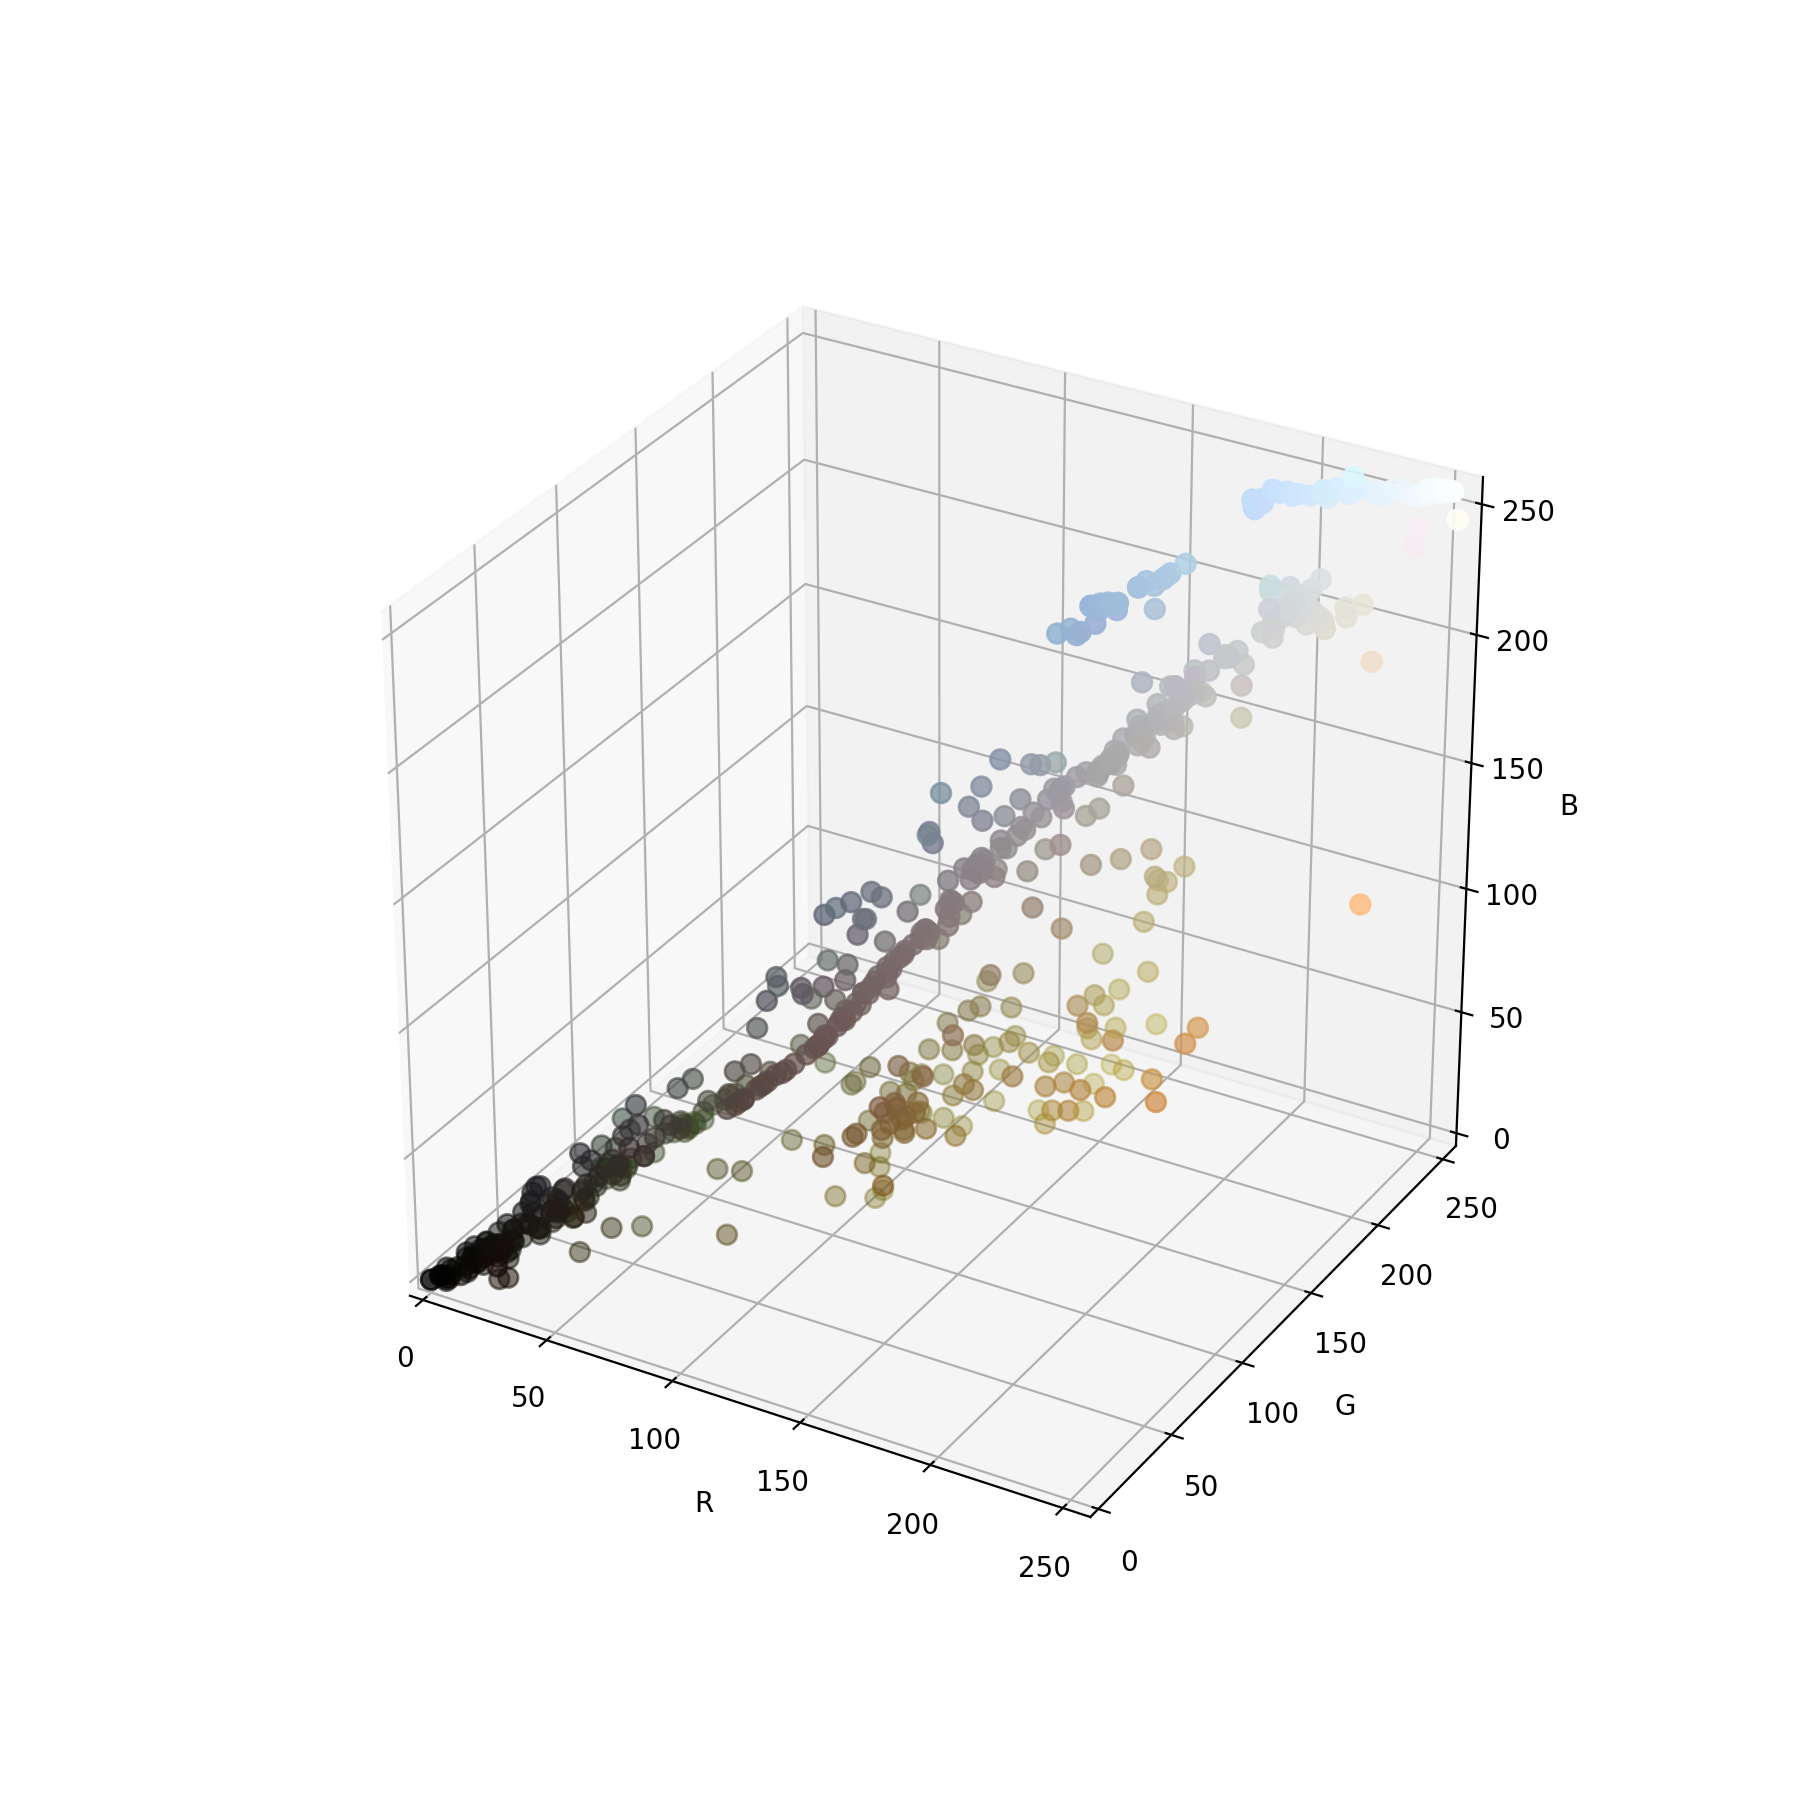

TypeError: show() takes 0 positional arguments but 1 was given

In [13]:
show_color_distribution(x)

<hr />
<h2>Problem</h2>

<p>Alle Werte vom Grün-Kanal werden auf null gesetzt und sollen in einen späteren Schritt wieder rekonstruiert werden.</p>

In [ ]:
xp0 = np.copy(x)        # copy of the original data
xp0[:,1] = 0            # set all values of the G-channel to zero
img_pred = np.reshape(xp0, [rows, cols, 3]) # reshape to an 2D RGB image
img_pred[0][0]

In [ ]:
show_image(img_pred)

In [ ]:
show_color_distribution(xp0) 

<hr />
<h2>Aufgabe</h2>

<p>Verwenden sie die Lineare&nbsp;Regression um aus den R und B Werten des Bildes den Grün-Kanal wieder herzustellen. Gehen sie dabei so vor wie im 1D Beispiel. Erweitern sie aber die Predictions- und Gradientenformeln um mit der zusätzlichen Dimension zurecht zu kommen. Berechnen sie die den Rekonstruktionsfehler und Plotten sie das Bild mit den rekonstruierten Grün-Kanal.</p>


In [ ]:
# TODO
t0 =  0.01
t1 = -0.01 
t2 = 0.001

# learn rate
m = rows * cols
alpha = 0.000003 / m

# predictions per iteration
predictions = []
y = x[:,1]

# train for 30 iterations
for i in range(30):
    
    # TODO prediction
    y_pred = t0 + t1*x[:,0] + t2*x[:,2]
#     print('y_pred', y_pred[0])
#     print('x', x[0])
    
    # TODO derivative
    d_t0 = np.sum(y_pred - y)
    d_t1 = np.sum((y_pred - y) * x[:,0])
    d_t2 = np.sum((y_pred - y) * x[:,2])

#     TODO update theta
    t0 = t0 - alpha * d_t0
    t1 = t1 - alpha * d_t1
    t2 = t2 - alpha * d_t2
    
    # print error
    print("{:2d} y_pred: {:3.0f} y: {:3d}".format(i, y_pred[0], y[0]))
 
    # remember the current predictions 
    predictions.append(y_pred)
    
x_pred = x.copy()
x_pred[:,1] = y_pred
img_pred = np.reshape(x_pred, [rows, cols, 3]) # reshape to an 2D RGB image
img_pred[0][0] 
show_image(img_pred)

<hr />
<h2>Ergebnis</h2>

<p>Das rekonstruierte Bild könnte wie folgt aussehen:</p>

<p><img alt="" src="http://home.htw-berlin.de/~hezel/computervision/WS1718/uebung1/LinearRegression_2D_Result.png" style="height:640px; margin-bottom:0px; margin-top:0px; width:640px" /></p>


<p>&nbsp;</p>

<hr />
<p>&nbsp;</p>

<h2>Abgabe</h2>

<p>Das von ihnen erstellte Notebook muss sp&auml;testens bis zum 19. November 2017 um 23:59 UTC+1 per E-Mail an&nbsp;<a href="mailto:hezel@htw-berlin.de" target="_blank">hezel@htw-berlin.de</a>&nbsp;eingesendet werden. Verwenden sie als Betreff bitte &quot;CV1718 &Uuml;bung1&nbsp;&lt;NAME&gt;&quot; und als Notebook Name &quot;CV1718_Ue1_LinearRegression_2D_NAME.ipynb&quot;. Bevor sie mir eine Mail schicken, entfernen sie bitte &uuml;ber &quot;Kernel&quot; -&gt; &quot;Restart and Clear Output&quot; s&auml;mtlichen von Python erstellten Inhalt und speichern anschlie&szlig;end das Notebook &quot;File&quot; -&gt; &quot;Save and Checkpoint&quot;.</p>
